## Cardiovascular Disease Project

Data description
There are 3 types of input features:

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.
Features:

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

DataSet Link - https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

#### QUESTIONS
1.What is the age more ricky for the high blood pressure
2.What is the age more ricky for the high glucose, cholesterol
3.How the cardio,active,smoke affect on high pressure,glucose,sholesterol

### QUALITY ISSUE IDENTIFY

####  - Identify quality issues (e.g. missing values, wrong measurements, …)

In [4]:
import numpy as np
import pandas as pd

In [167]:
df = pd.read_csv('cardio_train.csv',delimiter = ';')

In [168]:
df.info()
df.head()
#df.notna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [169]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Strange min weight 10 kg, and ap_hi - 150.00, ap_lo = -70!!!

In [177]:
df['age_year'] = (df.age / 365).astype('int')
#df.head()
low_weight = df[df['weight'] < 38].index
df.drop(low_weight, inplace=True)
low_ap_hi = df[df['ap_hi'] < 50 ].index
df.drop(low_ap_hi, inplace=True)
hi_ap_hi = df[df['ap_hi'] > 300 ].index
df.drop(hi_ap_hi, inplace=True)


low_ap_lo = df[df['ap_lo'] < 50].index
df.drop(low_ap_lo, inplace=True)
low_ap_hi = df[df['ap_lo'] > 130].index
df.drop(low_ap_hi, inplace=True)


In [178]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68663 entries, 0 to 69999
Data columns (total 14 columns):
id             68663 non-null int64
age            68663 non-null int64
gender         68663 non-null int64
height         68663 non-null int64
weight         68663 non-null float64
ap_hi          68663 non-null int64
ap_lo          68663 non-null int64
cholesterol    68663 non-null int64
gluc           68663 non-null int64
smoke          68663 non-null int64
alco           68663 non-null int64
active         68663 non-null int64
cardio         68663 non-null int64
age_year       68663 non-null int64
dtypes: float64(1), int64(13)
memory usage: 7.9 MB


In [179]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,68663.000000,68663.000000,68663.000000,68663.000000,68663.000000,68663.000000,68663.000000,68663.000000,68663.000000,68663.000000,68663.000000,68663.000000,68663.000000,68663.000000
mean,49974.143046,19463.991611,1.348790,164.368976,74.137807,126.614538,81.336440,1.364578,1.225682,0.087995,0.053493,0.803256,0.494604,52.827170
std,28848.969171,2468.166029,0.476591,8.175927,14.300544,16.690524,9.423936,0.678898,0.571614,0.283290,0.225016,0.397540,0.499975,6.769294
min,0.000000,10798.000000,1.000000,55.000000,38.000000,70.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,24996.500000,17657.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50010.000000,19701.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,74876.500000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,240.000000,130.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


In [180]:
del df['age']
df_clean= df

df.describe()

#### - Assess feature quality – how relevant is a certain measurement (e.g. use correlation matrix)

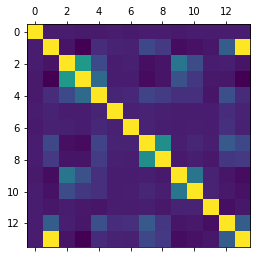

In [181]:
import matplotlib.pyplot as plt
plt.matshow(df_ag.corr())
plt.show()

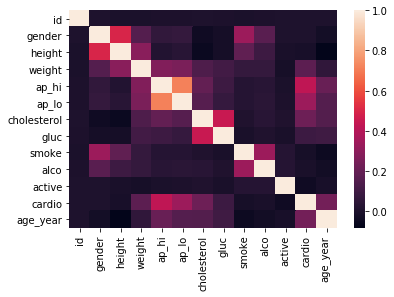

In [182]:
import seaborn as sns
corr = df_clean.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

#### - Get an idea on the value distribution of your data using statistical measures and visualizations

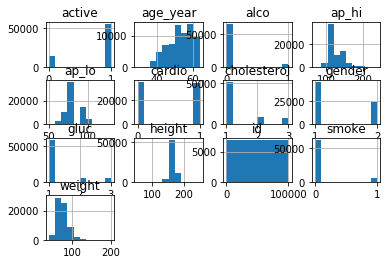

In [183]:
hist_age = df_clean.hist(bins=10)

In [ ]:
#p_hi 	ap_lo 	cholesterol 	gluc 	

Skewness: 0.898541
Kurtosis: 1.770003


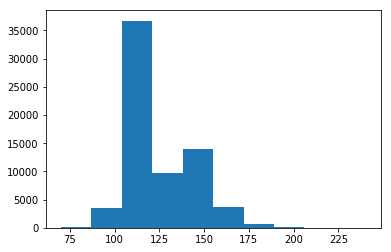

In [196]:
plt.hist(df_clean.ap_hi, bins=10)
print("Skewness: %f" % df_clean['ap_hi'].skew())
print("Kurtosis: %f" % df_clean['ap_hi'].kurt())


Skewness: 0.335712
Kurtosis: 1.399819


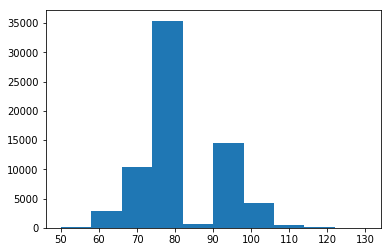

In [197]:
plt.hist(df_clean.ap_lo, bins=10)
print("Skewness: %f" % df_clean['ap_lo'].skew())
print("Kurtosis: %f" % df_clean['ap_lo'].kurt())

(array([51500.,  9293.,  7870.]),
 array([1.        , 1.66666667, 2.33333333, 3.        ]),
 <a list of 3 Patch objects>)

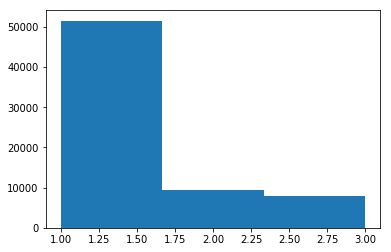

In [194]:
plt.hist(df_clean.cholesterol, bins=3)

(array([58385.,  5060.,  5218.]),
 array([1.        , 1.66666667, 2.33333333, 3.        ]),
 <a list of 3 Patch objects>)

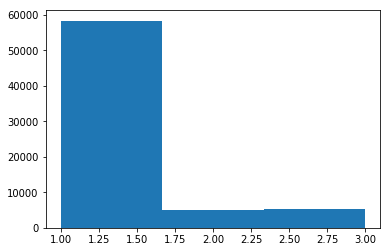

In [195]:
plt.hist(df_clean.gluc, bins=3)

plt.hist(df_clean.ap_lo, bins=10)

### DATA CLEANSING

Data types Are data types of columns matching their content? - All the data are digits int and floats.

Ranges Does the value distribution of values in a column make sense? - Data is clean now, all mistaken values are deleted. Data information are above.

Emptiness Are all values non-null where mandatory?  - We do not have NoN values now.

Uniqueness Are duplicates present where undesired? - All data are correct now.

Set memberships Are only allowed values chosen for categorical or ordinal fields?  - We have all categorical values.



#### FEATURE ENGINEERING

In [150]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69703 entries, 0 to 69999
Data columns (total 13 columns):
id             69703 non-null int64
gender         69703 non-null int64
height         69703 non-null int64
weight         69703 non-null float64
ap_hi          69703 non-null int64
ap_lo          69703 non-null int64
cholesterol    69703 non-null int64
gluc           69703 non-null int64
smoke          69703 non-null int64
alco           69703 non-null int64
active         69703 non-null int64
cardio         69703 non-null int64
age_year       69703 non-null int64
dtypes: float64(1), int64(12)
memory usage: 7.4 MB


Imputing Some algorithms are very sensitive to missing values. - Not have that kind of data.

Filtering Sometimes imputing values doesn’t perform well, therefore deletion of low quality records is a better strategy - Bad data deleted.

Discretizing Continuous fields might confuse the model - Not our case.

One-hot-encoding Categorical integer features should be transformed into “one-hot” vectors - Done already.

Time-to-Frequency transformation Time-series (and sometimes also sequence data) is recorded in the time domain -  not have that kind of data.



### MODELs and EMPLIMENTATION

In [207]:
fearutes = ['age_year','gender','height','weight','ap_hi','ap_lo',
            'cholesterol','gluc','smoke','alco','active']
df_feature = df_clean.filter(fearutes)
df_feature.head()

,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50,2,168,62.0,110,80,1,1,0,0,1
1,55,1,156,85.0,140,90,3,1,0,0,1
2,51,1,165,64.0,130,70,3,1,0,0,0
3,48,2,169,82.0,150,100,1,1,0,0,1
4,47,1,156,56.0,100,60,1,1,0,0,0


In [208]:
df_target = df_clean.filter(['cardio'])
df_target.head()

,cardio
0,0
1,1
2,1
3,1
4,0


In [226]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [210]:
X_train,X_test,y_train,y_test = train_test_split(df_feature,df_target,test_size=0.2, random_state=42)

In [214]:
classifier = RandomForestClassifier(n_estimators=50,max_depth=2,random_state=0)
classifier.fit(X_train,y_train)

/Users/vlad3d/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [216]:
print('  ',classifier.feature_importances_)
#1.53343411e-01 - age
#3.89705378e-01 - ap_hi
#2.98525061e-01 - ap_low
#1.17682384e-01 - cholesterol


   [1.53343411e-01 5.87706915e-04 4.55480825e-04 2.84586354e-02
 3.89705378e-01 2.98525061e-01 1.17682384e-01 9.95836621e-03
 2.75492116e-04 1.05063640e-04 9.03021112e-04]


Most important paremters for the heart deseas is - ap_hi,ap_low,age,cholesterol.

In [217]:
classifier.score(X_test,y_test)

0.7144105439452414

Tune model parameters for better result.

In [232]:
classifier = RandomForestClassifier(n_estimators=1000,max_depth=10,random_state=0)
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)

/Users/vlad3d/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.7344353018277142

Try Logistic regression model.

In [233]:
  from sklearn.linear_model import LogisticRegression

In [234]:
clf_log = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train,y_train)

/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [235]:
clf_log.score(X_test,y_test)

0.711861938396563

Try SVM machine

In [236]:
from sklearn import svm

In [237]:
clf_svm = svm.SVC(gamma='scale').fit(X_train,y_train)

/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [238]:
clf_svm.score(X_test,y_test)

0.7278089274011506

Scale our parameters.


In [247]:
from sklearn import preprocessing 

In [251]:
x = df_feature.values
min_max_sc = preprocessing.MinMaxScaler()
x_scaled = min_max_sc.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.600000,1.0,0.579487,0.148148,0.235294,0.375,0.0,0.0,0.0,0.0,1.0
1,0.742857,0.0,0.517949,0.290123,0.411765,0.500,1.0,0.0,0.0,0.0,1.0
2,0.628571,0.0,0.564103,0.160494,0.352941,0.250,1.0,0.0,0.0,0.0,0.0
3,0.542857,1.0,0.584615,0.271605,0.470588,0.625,0.0,0.0,0.0,0.0,1.0
4,0.514286,0.0,0.517949,0.111111,0.176471,0.125,0.0,0.0,0.0,0.0,0.0


In [252]:
X_train,X_test,y_train,y_test = train_test_split(df_scaled,df_target,test_size=0.2, random_state=42)

In [253]:
clf_svm.fit(X_train,y_train)

/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [254]:
clf_svm.score(X_test,y_test)

0.7309400713609554

Let see Random Forest with scaled data

In [255]:
classifier = RandomForestClassifier(n_estimators=1000,max_depth=10,random_state=0)
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)

/Users/vlad3d/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.7343624845263235

Test Linear Regression also

In [267]:
clf_log = LogisticRegression(dual=False, 
                             tol=0.000001, C=10.0, fit_intercept=True,
                             intercept_scaling=1, class_weight=None, 
                             random_state=None,max_iter=100,
                             verbose=0, warm_start=False,
                             n_jobs=None)
clf_log.fit(X_train,y_train)
clf_log.score(X_test,y_test)

/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7286827350178402

Best model for non deep lerning is RandomForestClassifier. Best accuracy is - 0.7343624845263235

In [268]:
from sklearn.neural_network import MLPClassifier

In [284]:
clf_mlp = MLPClassifier(solver='adam', alpha=1e-5,
                   hidden_layer_sizes=(5, 50), 
                   random_state=1,learning_rate='adaptive',
                   max_iter=500)

In [285]:
clf_mlp.fit(X_train,y_train)

/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 50), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [286]:
clf_mlp.score(X_test,y_test)

0.7345081191291051

Best model for non deep lerning is MLPClassifier. Best accuracy is - 0.7345081191291051
Demonstrate high results from the box on the default settings

### MODEL EVALUATION.


Best model for non deep lerning is MLPClassifier. Best accuracy is - 0.7345081191291051

In [292]:
from sklearn.metrics import f1_score

In [293]:
y_pred = clf_mlp.fit(X_train, y_train).predict(X_test)

/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [296]:
f1_score(y_test,y_pred, average=None)

array([0.74698126, 0.72074142])